In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


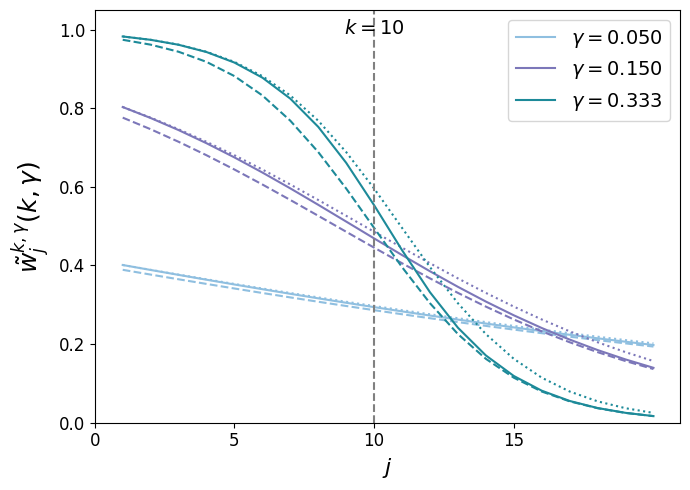

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_w_j(k, c, max_j):
    a = -np.log(1 - c)
    w = np.zeros((k+1, max_j+1))

    # Base cases
    for j in range(1, max_j+1):
        w[0, j] = 0
    for i in range(k+1):
        w[i, 0] = 0

    # Recurrence relation
    for i in range(1, k+1):
        for j in range(1, max_j+1):
            w[i, j] = (np.exp(a) - 1) * np.exp(-a*j) + \
                      np.exp(-a*j) * w[i-1, j] + \
                      (1 - np.exp(-a*(j-1))) * w[i-1, j-1]

    return w[k, 1:]

def lower_bound(j, k, c):
    a = -np.log(1 - c)
    return (1 - np.exp(-a*k)) / (1 - np.exp(-a*k) + np.exp(-a*(k-j)))

def upper_bound(j, k, c):
    a = -np.log(1 - c)
    return (1 - np.exp(-a*k)) / (1 - np.exp(-a*k) + np.exp(-a*(k-j+1)))

def plot_w_j(k, c_values):
    j_values = np.arange(1, 2*k+1)
    colors = ['#8FBFE0', '#7C77B9', '#1D8A99']

    plt.figure(figsize=(7, 5))

    for idx, c in enumerate(c_values):
        w_values = compute_w_j(k, c, 2*k)
        lower_bound_values = [lower_bound(j, k, c) for j in j_values]
        upper_bound_values = [upper_bound(j, k, c) for j in j_values]

        plt.plot(j_values, w_values, color=colors[idx], label=r'$\gamma={:.3f}$'.format(c))
        plt.plot(j_values, lower_bound_values, '--', color=colors[idx])
        # , label=r'Lower bound $(\gamma={:.3f})$'.format(c)
        plt.plot(j_values, upper_bound_values, ':', color=colors[idx])
        # , label=r'Upper bound $(\gamma={:.3f})$'.format(c)

    plt.axvline(x=k, color='gray', linestyle='--')
    plt.text(k, 0.99, r'$k={}$'.format(k), ha='center', fontsize=14)

    plt.xlabel(r'$j$', fontsize=16)
    plt.ylabel(r'$\tilde{w}^{k,\gamma}_j(k, \gamma)$', fontsize=18)
    # plt.title(r'$w_j(k, \gamma)$ and its bounds for $k={}$'.format(k), fontsize=14, pad=20)
    plt.legend(fontsize=14)
    plt.ylim(0, 1.05)

    plt.xticks(np.arange(0, 20, 5), fontsize=12)
    plt.yticks(fontsize=12)
    plt.rcParams['lines.antialiased'] = False

    plt.tight_layout()
    plt.savefig('/content/drive/My Drive/wj_vs_gamma.png', dpi=600)
    # plt.show()

# Example usage
k = 10
c_values = [0.05, 0.15, 1/3]
plot_w_j(k, c_values)